# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [5]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [7]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,707,92,35,58,136,58,6,122,55,17,132,142,222,116,64,6,17,197,203
1,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
2,247,91,39,83,176,59,7,169,39,20,132,190,426,142,67,0,24,192,199
3,639,108,55,105,230,68,11,218,30,24,171,228,709,210,69,14,4,190,197
4,739,96,44,85,166,66,10,155,43,19,150,167,355,159,67,3,10,192,202
5,387,90,47,85,145,58,9,152,44,19,155,175,345,184,73,4,2,186,197
6,560,105,55,96,181,56,9,219,30,25,175,231,713,216,74,4,5,187,194
7,588,89,38,78,153,61,7,146,46,19,127,166,314,142,69,0,9,187,194
8,781,88,42,64,151,62,8,130,51,18,142,150,253,161,63,3,2,203,210
9,142,106,49,107,194,57,11,214,31,24,161,224,670,172,67,0,39,192,206


Methods `describe` and `info` deliver some useful information.

In [8]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.335155,93.755920,44.943534,81.903461,168.477231,61.746812,8.522769,168.336976,41.060109,20.540984,148.198543,187.996357,437.105647,174.928962,72.524590,6.486339,12.136612,188.783242,195.486339
std,245.929009,8.201977,6.134926,15.752759,33.641166,8.109403,4.562415,33.145297,7.771722,2.585165,14.591353,31.278301,176.288219,31.928188,7.335659,4.943319,8.674650,6.128074,7.357546
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,204.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,34.000000,19.000000,137.000000,168.000000,319.000000,151.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,412.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,177.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,635.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,196.000000,46.000000,23.000000,160.000000,216.000000,576.000000,197.000000,75.000000,10.000000,17.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,39.000000,206.000000,211.000000


In [9]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Нужно скалировать данные перед обучением моделей, для фита скейлера используем только трейн выборку.

In [11]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score, recall_score
from scikitplot.metrics import plot_roc

In [47]:
logleg = LogisticRegression(random_state=12345, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logleg_params = {"class_weight": [None, 'balanced'], "penalty": ['l1', 'l2', None]}
logleg_grid = GridSearchCV(logleg,param_grid = logleg_params, scoring='f1_micro')

In [78]:
%%time
logleg_grid.fit(X_train_scaled,y_train)

CPU times: total: 1.83 s
Wall time: 1.85 s


GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=12345, solver='saga',
                                          tol=0.001),
             param_grid={'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', None]},
             scoring='f1_micro')

In [79]:
logleg_grid.best_estimator_

LogisticRegression(max_iter=500, multi_class='multinomial', penalty=None,
                   random_state=12345, solver='saga', tol=0.001)

In [83]:
predicted_test = logleg_grid.predict(X_test_scaled)
probabilities_test = logleg_grid.predict_proba(X_test_scaled)
print("F1:", f1_score(y_test, predicted_test, average='micro'))
print("Accuracy:", accuracy_score(y_test, predicted_test))

F1: 0.7912457912457911
Accuracy: 0.7912457912457912


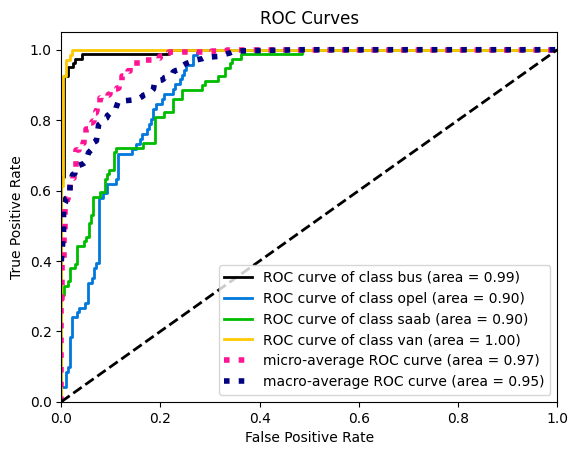

In [84]:
plot_roc(y_test, probabilities_test);

Обучили лог. регрессию используя кросс-валидацию и небольшой подбор гиперпараметров через gridsearchcv. Посчитали метрики f1 и accuracy на тестовой выборке, нарисовали ROC-кривую.

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
pca = PCA(copy=True,svd_solver='full')

In [70]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [71]:
pca.explained_variance_ratio_

array([4.97296935e-01, 1.58257732e-01, 1.00611724e-01, 6.17082318e-02,
       5.28007349e-02, 4.83917854e-02, 2.88829613e-02, 1.71247795e-02,
       1.09783846e-02, 8.45907038e-03, 4.88712816e-03, 3.34538446e-03,
       2.41221754e-03, 1.90456763e-03, 1.08946202e-03, 8.34715888e-04,
       6.66326640e-04, 3.29045975e-04, 1.88123734e-05])

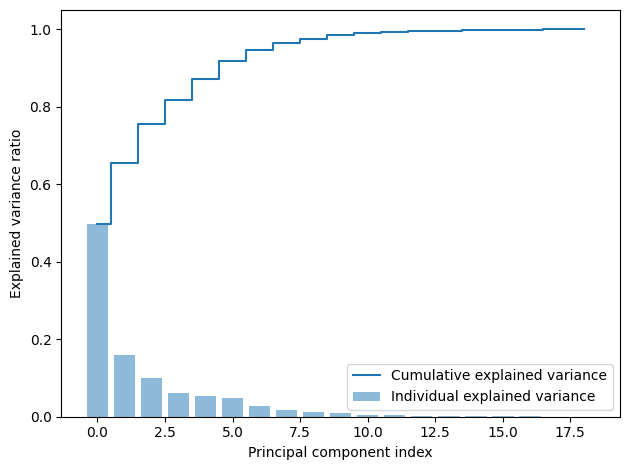

In [72]:
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(np.cumsum(pca.explained_variance_ratio_))), np.cumsum(pca.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

После разложения по главным компонентам видим, что можем снизить размерность как минимум в двое, без значимых потерь. А если не отнормировать, то 2 главные компоненты все перебивают, так что это ответ на вопрос в следующем пункте про нормализацию.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Нормализовать нужно, ответ выше.

In [92]:
pca = PCA(n_components=8,copy=True,svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.49729694 0.15825773 0.10061172 0.06170823 0.05280073 0.04839179
 0.02888296 0.01712478]
[0.49729694 0.65555467 0.75616639 0.81787462 0.87067536 0.91906714
 0.9479501  0.96507488]


Взяли 8 компонент, потому что кум.сумма дисперсий больше 95%

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [90]:
%%time
logleg_grid.fit(X_train_pca,y_train)

CPU times: total: 391 ms
Wall time: 379 ms


GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=12345, solver='saga',
                                          tol=0.001),
             param_grid={'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', None]},
             scoring='f1_micro')

In [96]:
logleg_grid.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=500,
                   multi_class='multinomial', penalty=None, random_state=12345,
                   solver='saga', tol=0.001)

In [94]:
predicted_test = logleg_grid.predict(X_test_pca)
probabilities_test = logleg_grid.predict_proba(X_test_pca)
print("F1:", f1_score(y_test, predicted_test, average='micro'))
print("Accuracy:", accuracy_score(y_test, predicted_test))

F1: 0.622895622895623
Accuracy: 0.622895622895623


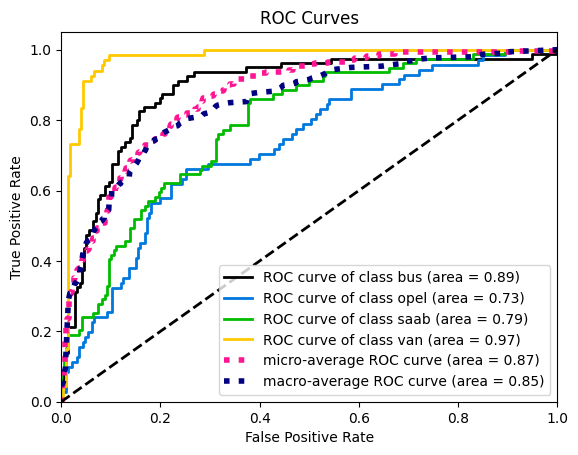

In [95]:
plot_roc(y_test, probabilities_test);

При уменьшении размерности матрицы признаков в 2 раза, значение f1 и accuracy метрик упало на ~22%

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(random_state=12345)
tree_params = {"max_depth": range(1,100,1)}
tree_grid = GridSearchCV(tree,param_grid = tree_params, scoring='f1_micro', n_jobs=16, verbose=3)

In [100]:
%%time
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
CPU times: total: 250 ms
Wall time: 4.65 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=12345), n_jobs=16,
             param_grid={'max_depth': range(1, 100)}, scoring='f1_micro',
             verbose=3)

In [101]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, random_state=12345)

In [103]:
predicted_test = tree_grid.predict(X_test)
probabilities_test = tree_grid.predict_proba(X_test)
print("F1:", f1_score(y_test, predicted_test, average='micro'))
print("Accuracy:", accuracy_score(y_test, predicted_test))

F1: 0.7205387205387206
Accuracy: 0.7205387205387206


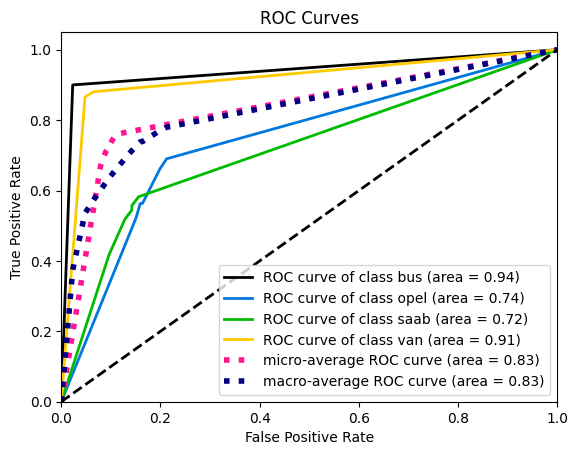

In [104]:
plot_roc(y_test, probabilities_test);

Лучшая максимальная глубина = 10, score = 0.72, на roc кривой есть излом

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [186]:
from sklearn.ensemble import BaggingClassifier

In [190]:
f1_logreg_bagging = []
f1_tree_bagging = []
acc_logreg_bagging = []
acc_tree_bagging = []
for i in range(2,100,5):
    logleg_bagging = BaggingClassifier(estimator=LogisticRegression(random_state=12345, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, class_weight='balanced', penalty=None), n_estimators=i, bootstrap=True, random_state=12345, n_jobs=16)
    tree_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=12345, max_depth=10), n_estimators=i, bootstrap=True, random_state=12345, n_jobs=16)
    logleg_bagging.fit(X_train_scaled, y_train)
    tree_bagging.fit(X_train, y_train)
    logleg_bagging_predict = logleg_bagging.predict(X_test_scaled)
    tree_bagging_predict = tree_bagging.predict(X_test)
    f1_logreg_bagging.append(f1_score(y_test, logleg_bagging_predict, average='micro'))
    f1_tree_bagging.append(f1_score(y_test, tree_bagging_predict, average='micro'))
    acc_logreg_bagging.append(accuracy_score(y_test, logleg_bagging_predict))
    acc_tree_bagging.append(accuracy_score(y_test, tree_bagging_predict))

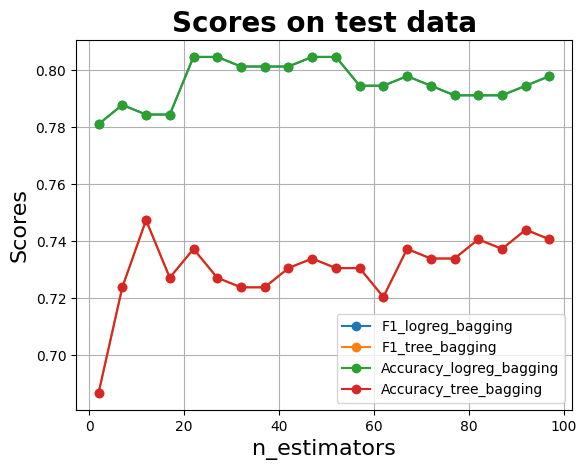

: 

In [192]:
_, ax = plt.subplots(1,1)
ax.plot(range(2,100,5), f1_logreg_bagging, '-o', label= 'F1_logreg_bagging')
ax.plot(range(2,100,5), f1_tree_bagging, '-o', label= 'F1_tree_bagging')
ax.plot(range(2,100,5), acc_logreg_bagging, '-o', label= 'Accuracy_logreg_bagging')
ax.plot(range(2,100,5), acc_tree_bagging, '-o', label= 'Accuracy_tree_bagging')
ax.set_title("Scores on test data", fontsize=20, fontweight='bold')
ax.set_xlabel('n_estimators', fontsize=16)
ax.set_ylabel('Scores', fontsize=16)
ax.legend(loc="best", fontsize=10)
ax.grid('on')

При относительно небольшом числе моделей в ансамбле мы достигаем максимума (10 для деревьев, 20 для регрессии), затем начинается переобучение. Что интересно, при 100 мы снова почти выходим на максимум (в случайном лесу при 100 как раз максимум скора).
По личному опыту оптимальные гиперпараметры для 1 моделей, и для ее ансамблей отличаются, но могу ошибаться.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [159]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12345)
forest_params = {"n_estimators": range(1,500,10)}
forest_grid = GridSearchCV(forest, param_grid = forest_params, scoring=['f1_micro','accuracy'], n_jobs=16, verbose=3, return_train_score=True, refit=False)

In [160]:
%%time
forest_grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 172 ms
Wall time: 20 s


GridSearchCV(estimator=RandomForestClassifier(random_state=12345), n_jobs=16,
             param_grid={'n_estimators': range(1, 500, 10)}, refit=False,
             return_train_score=True, scoring=['f1_micro', 'accuracy'],
             verbose=3)

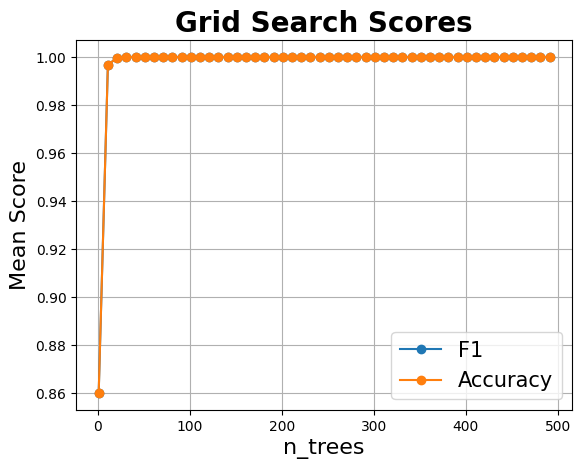

In [164]:
_, ax = plt.subplots(1,1)
ax.plot(list(forest_grid.cv_results_['param_n_estimators']), forest_grid.cv_results_['mean_train_f1_micro'], '-o', label= 'F1')
ax.plot(list(forest_grid.cv_results_['param_n_estimators']), forest_grid.cv_results_['mean_train_accuracy'], '-o', label= 'Accuracy')
ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
ax.set_xlabel('n_trees', fontsize=16)
ax.set_ylabel('Mean Score', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.grid('on')

In [156]:
f1_scores = []
acc_scores = []
for i in range(1,500,10):
    forest = RandomForestClassifier(random_state=12345, n_estimators=i)
    forest.fit(X_train,y_train)
    prediction = forest.predict(X_test)
    f1_scores.append(f1_score(y_test, prediction, average='micro'))
    acc_scores.append(accuracy_score(y_test, prediction))


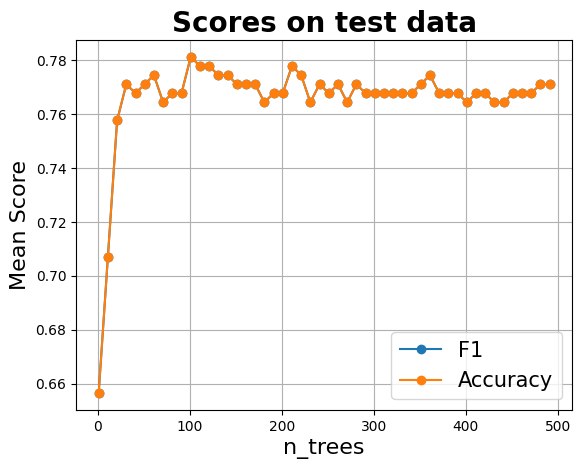

In [165]:
 _, ax = plt.subplots(1,1)
 ax.plot(range(1,500,10), f1_scores, '-o', label= 'F1')
 ax.plot(range(1,500,10), acc_scores, '-o', label= 'Accuracy')
 ax.set_title("Scores on test data", fontsize=20, fontweight='bold')
ax.set_xlabel('n_trees', fontsize=16)
ax.set_ylabel('Mean Score', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.grid('on')

При кросс-валидации на трейн выборке скор упирается в 1 уже при 20 деревьях.
А вот если подглядывать в тест (что, понятно, не хорошо), то видим лучший результат при дефолтных 100, а дальше моделька переобучается

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [176]:
best_logreg = LogisticRegression(random_state=12345, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, class_weight='balanced', penalty=None)
best_tree = DecisionTreeClassifier(random_state=12345, max_depth=10)
best_forest = RandomForestClassifier(random_state=12345, n_estimators=100)

In [179]:
n_batch = 10
batch_size = len(X_train)/n_batch
f1_logreg = []
f1_tree = []
f1_forest = []
acc_logreg = []
acc_tree = []
acc_forest = []
for i in range(n_batch):
    if i+1 == n_batch:
        batch_x = X_train
        batch_y = y_train
    else:
        batch_x = X_train[:(i+1)*int(batch_size)]
        batch_y = y_train[:(i+1)*int(batch_size)]
    scaler.fit(batch_x)
    batch_x_scaled = scaler.transform(batch_x)
    test_x_scaled_batch = scaler.transform(X_test)
    best_logreg.fit(batch_x_scaled,batch_y)
    best_tree.fit(batch_x,batch_y)
    best_forest.fit(batch_x,batch_y)
    best_logreg_pred = best_logreg.predict(test_x_scaled_batch)
    best_tree_pred = best_tree.predict(X_test)
    best_forest_pred = best_forest.predict(X_test)
    f1_logreg.append(f1_score(y_test, best_logreg_pred, average='micro'))
    f1_tree.append(f1_score(y_test, best_tree_pred, average='micro'))
    f1_forest.append(f1_score(y_test, best_forest_pred, average='micro'))
    acc_logreg.append(accuracy_score(y_test, best_logreg_pred))
    acc_tree.append(accuracy_score(y_test, best_tree_pred))
    acc_forest.append(accuracy_score(y_test, best_forest_pred))
    


c:\Projects\ml-course\ml-course-hw\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Projects\ml-course\ml-course-hw\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Projects\ml-course\ml-course-hw\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Projects\ml-course\ml-course-hw\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Projects\ml-course\ml-course-hw\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Projects\ml-course\ml-course-hw\

In [183]:
import numpy as np

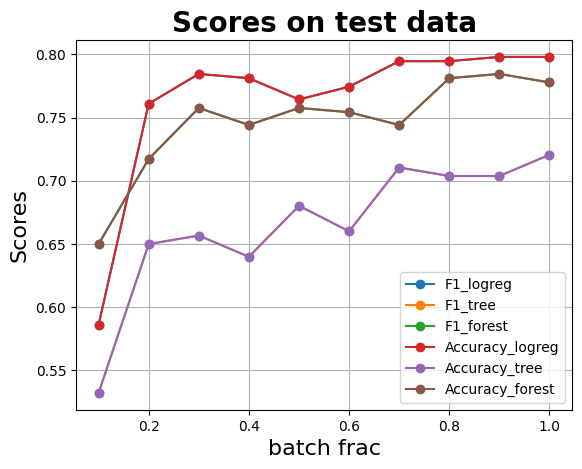

In [185]:
_, ax = plt.subplots(1,1)
ax.plot(np.arange(0.1, 1.1, 0.1), f1_logreg, '-o', label= 'F1_logreg')
ax.plot(np.arange(0.1, 1.1, 0.1), f1_tree, '-o', label= 'F1_tree')
ax.plot(np.arange(0.1, 1.1, 0.1), f1_forest, '-o', label= 'F1_forest')
ax.plot(np.arange(0.1, 1.1, 0.1), acc_logreg, '-o', label= 'Accuracy_logreg')
ax.plot(np.arange(0.1, 1.1, 0.1), acc_tree, '-o', label= 'Accuracy_tree')
ax.plot(np.arange(0.1, 1.1, 0.1), acc_forest, '-o', label= 'Accuracy_forest')
ax.set_title("Scores on test data", fontsize=20, fontweight='bold')
ax.set_xlabel('batch frac', fontsize=16)
ax.set_ylabel('Scores', fontsize=16)
ax.legend(loc="best", fontsize=10)
ax.grid('on')

* Для деревянных моделей относительно быстро выходим на высокое качество, уже при 0.3/0.4 от исходной выборки;
* Для регрессии результат хуже, плато начинается на 0.7 от исходного размера выборки;

### Выводы

* В этой лабе создавали модели лог.регресии, решающего дерева и случайного леса, использовали кросс-валидацию и подбирали оптимальные гиперпараметры;
* Использовали PCA для снижения размерности и оценили влияние на качество;
* Попробовали использовать ансамбли и оценили оптимальное количество моделей в них;
* Оценили влияние размера обучающей выборки на качетсво модели;
* Я так и не понял, почему у меня acc и f1 совпадает, это из-за того что я использую f1_micro?